# Lab 3 Assignment
__Authors__: Dan Davieau, Paul Panek, Olga Tanyuk, Nathan Wall

## Business Understanding

For this analysis we used the "raw_residential_data" and "raw_address_points.csv" data sets from Christopher Coreeas's "DC Residential Properties" Kaggle: https://www.kaggle.com/christophercorrea/dc-residential-properties. 

The data set inludes Sale Price, Date of sale, 34 attributes describing the physical aspects of residential properties in DC, as well as more than 40 attributes describing their locations and the jusrisdictions in which they are located.  The data was originally collected for planning and management of Washington, D.C. by local government agencies.  Although we have elected not to use the data for this purpose, it could also be used to predict prices of residential properties in Washington DC, or to describe the various geographic subdivisions in terms of prevalence of housing with particular characteristics.

We have elected to use this data set to perform unsupervised learning with respect to the physical attributes of the properties.  We were curious to see how clustering algorithms may group the properties in terms of their physical attributes to see of meaningful distinctions could be made that those experienced in the field might otherwise miss.

If meaningful, unexpected groupings are discovered this could help various constituencies.  It could help:
- Jusrisdictions in understanding something about their constituents.
- Buyers, Sellers and their agents in identifying competing or alternative properties.

We will evaluate effectiveness of different clustering algorithms with the following:

1) Silhouette Coefficient because it considers the simialrity of items within the cluster and their distance from item in the nearest other cluster when the "ground truth" is not known.

2) The Number of clusters created and their relative sizes.  (e.g. Neither one cluster containing 99% of the observations nor a large number of very small clusters would be helpful.)

3) Visual inspection of the clusters using PCA to reduce the number of dimensions.

In [10]:
#Environment setup
# import os
# path="C:/Users/danie/Documents/GitHub/DataMiningGroupProjects/Lab 3"
# os.chdir(path)
import plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, iplot_mpl
import plotly.graph_objs as go
init_notebook_mode(connected=True)
print(__version__)# requires version >= 1.9.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
import seaborn as sns
sns.set(style="darkgrid")

3.4.1


In [11]:
%%javascript
// Toggle off Jupyter autoscrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

***
## Data Understanding 1

### raw_residential_data.csv 
The residential data contains housing characteristics for residential properties. It was created as part of the D.C. Geographic Information System (DC GIS) for the D.C. Office of the Chief Technology Officer (OCTO) and participating D.C. government agencies.

Descriptions for the data are incomplete however the following was included:  

> __OBJECTID:__ Auto-generated internal unique ID  
__SSL__: Square, suffix, lot ID  
__BATHRM__: Number of full bathrooms  
__HF_BATHRM__: Number of half bathrooms (no shower or tub)  
__HEAT__: Heating code *0 = No Data, 1 = Forced Air, 2 = Air-Oil, 3 = Wall Furnace, 4 = Electric Rad, 5 = Elec Base Brd, 
6 = Water Base Brd, 7 = Warm Cool, 8 = Ht Pump, 9 = Evp Cool, 10 = Air Exchng, 11 = Gravity Furnac, 12 = Ind Unit, 13 = Hot Water Rad*  
__AC:__ Air conditioning (Y/N)  
__NUM_UNITS:__ Number of units  
__ROOMS:__ Number of rooms  
__BEDRM:__ Number of bedrooms  
__AYB:__ The earliest time the main portion of the building was built. It is not affected by subsequent construction.  
__STORIES:__ Stories  
__SALE_NUM:__ Sale number  
__GBA:__ Gross building area in square feet  
__STYLE:__ Style code  *0 = Default, 1 = 1 Story, 2 = 1.5 Story Unfin, 3 = 1.5 Story Fin, 4 = 2 Story, 5 = 2.5 Story Unfin, 6 = 2.5 Story Fin, 7 = 3 Story, 8 = 3.5 Story, 9 = 3.5 Story Fin, 10 = 4 Story, 11 = 4.5 Story Unfin, 12 = 4.5 Story Fin, 13 = Bi-Level, 14 = Split Level, 15 = Split Foyer, 94 = Outbuildings, 99 = Vacant*  
__STRUCT:__ Structure code *0 = Default, 1 = Single, 2 = Multi, 4 = Town End, 5 = Town Inside, 6 = Row End, 7 = Row Inside, 8 = Semi-Detached, 13 = Vacant Land*  
__EXTWALL:__ Exterior wall code *0 = Default, 1 = Plywood, 2 = Hardboard, 3 = Metal Siding, 4 = Vinyl Siding, 5 = Stucco, 6 = Wood Siding, 7 = Shingle, 8 = SPlaster, 9 = Rustic Log, 10 = Brick Veneer, 11 = Stone Veneer, 12 = Concrete Block, 13 = Stucco Block, 14 = Common Brick, 15 = Face Brick, 16 = Adobe, 17 = Stone, 18 = Concrete, 19 = Aluminum, 20 = Brick/Stone, 21 = Brick/Stucco, 22 = Brick/Siding, 23 = Stone/Stucco, 24 = Stone/Siding*  
__ROOF:__ Roof type code *0 = Typical, 1 = Comp Shingle, 2 = Built Up, 3 = Shingle, 4 = Shake, 5 = Metal- Pre, 6 = Metal- Sms, 7 = Metal- Cpr, 8 = Composition Ro, 9 = Concrete Tile, 10 = Clay Tile, 11 = Slate, 12 = Concrete, 13 = Neopren, 14 = Water Proof, 15 = Wood- FS*  
__INTWALL:__  Interior wall code *, 0 = Default, 1 = Resiliant, 2 = Carpet, 3 = Wood Floor, 4 = Ceramic Tile, 5 = Terrazo, 6 = Hardwood, 7 = Parquet, 8 = Vinyl Comp, 9 = Vinyl Sheet, 10 = Lt Concrete, 11 = Hardwood/Carp*  
__KITCHENS:__ Number of kitchens  
__FIREPLACES:__ Number of fireplaces  
__LANDAREA:__ Land area of property in square feet  
__LATITUDE:__ Lattitude of address  
__LONGITUDE:__ Longitude of Address  
__ASSESSMENT_NBHD:__ DC Neighborhood  
__WARD:__ DC Wards  

### raw_address_points.csv
The raw address points data contains latitude and longitude coordinates by street address among other attributes as of July 2018. This file is part of the Master Address Repository (MAR) for the D.C. Office of the Chief Technology Officer and DC Department of Consumer and Regulatory Affairs.  

After analyzing we concluded that the "SSL" attribute is our only option to join the raw residential and address points data.

There was no attribute level metadata included with this data. However, upon researching http://opendata.dc.gov/datasets/3c8c90b33dbe41cd965634dda58dfd80_7 we found:  
> __SSL:__ Represents "Square Suffix and Lot".  
*The relationship between an address and an SSL is a many to many relationship. One SSL (Square, Suffix, Lot) can have multiple addresses located on it. This often includes garden style apartment complexes as well as corner addresses with separate addresses facing each adjacent street. One address can also sit upon multiple properties. One single family residence can sit upon multiple lots. The address records only contain one 'base' SSL (usually comes from OwnerPly). The cross reference table contains the many to many relationship between an address and an SSL. Some addresses do not have an associated SSL (such as some metro entrances or many addresses on Federal property). In, the address table, each address record will only be associated with one SSL. That SSL will be the base SSL, which is the SSL under which the address point is located.*

We have a total of 107,154 residential observations with 39 attributes.
We are unable to match 670 of the 107,154 observations in the join. For now, we will exclude them from our analysis. 

In [12]:
#Import the data
df1 = pd.read_csv('Data/raw_residential_data.csv',low_memory=False)
df2 = pd.read_csv('Data/raw_address_points.csv',low_memory=False)
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107154 entries, 0 to 107153
Data columns (total 39 columns):
OBJECTID             107154 non-null int64
SSL                  107154 non-null object
BATHRM               107127 non-null float64
HF_BATHRM            107126 non-null float64
HEAT                 107127 non-null float64
HEAT_D               107127 non-null object
AC                   107127 non-null object
NUM_UNITS            107127 non-null float64
ROOMS                107110 non-null float64
BEDRM                107123 non-null float64
AYB                  107141 non-null float64
YR_RMDL              49446 non-null float64
EYB                  107154 non-null int64
STORIES              107080 non-null float64
SALEDATE             107154 non-null object
PRICE                87866 non-null float64
QUALIFIED            107154 non-null object
SALE_NUM             107154 non-null int64
GBA                  107154 non-null int64
BLDG_NUM             107154 non-null int64
STYLE 

Below we drop redundant attributes, subset our variables of interest and assess NULL values and potential outliers that need to be addressed.

In [13]:
#Set list of categorical variables
categories = [['CNDTN_D','CNDTN'],['HEAT_D','HEAT'],['STYLE_D','STYLE'],['STRUCT_D','STRUCT'],['GRADE_D','GRADE'],['ROOF_D','ROOF'],['EXTWALL_D','EXTWALL'],['INTWALL_D','INTWALL']]
cat_drop = []
for c in categories:
    round(df1[c[1]])
    cat_drop.append(c[0])
# eliminate redundant dummy variables
df1.drop(cat_drop, inplace=True, axis=1)
df1.describe(include='all')

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
count,107154.00000,107154,107127.000000,107126.000000,107127.000000,107127,107127.000000,107110.000000,107123.000000,107141.000000,...,107127.000000,107127.000000,107127.000000,107127.000000,107127.000000,107126.000000,107126.000000,107154.000000,107154.000000,107154
unique,NaN,107087,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,5881S 0004,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-22T18:01:43.000Z
freq,NaN,5,NaN,NaN,NaN,66554,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107154
mean,53577.50000,NaN,2.033194,0.607014,7.647941,NaN,1.198157,7.360181,3.373001,1929.684761,...,4.267384,3.524788,13.361113,3.989965,6.144576,1.219405,0.620662,13.138390,3419.642029,NaN
std,30932.83971,NaN,1.064627,0.616420,5.039394,NaN,0.597304,2.345917,1.150341,94.585682,...,1.367921,0.716789,3.928077,3.349059,1.957959,0.621446,0.894729,4.992594,6122.659252,NaN
min,1.00000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,26789.25000,NaN,1.000000,0.000000,1.000000,NaN,1.000000,6.000000,3.000000,1914.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1599.000000,NaN
50%,53577.50000,NaN,2.000000,1.000000,7.000000,NaN,1.000000,7.000000,3.000000,1930.000000,...,4.000000,3.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2363.000000,NaN
75%,80365.75000,NaN,3.000000,1.000000,13.000000,NaN,1.000000,8.000000,4.000000,1947.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4199.000000,NaN


We now have 31 attributes but several have null values. For each of them with 100 or fewer nulls we will impute the missing values using the most common class or median value. However, the year remodeled, & price stand out and will probably need to be treated differently.

For the year remodeled we will assume that variable is missing when no remodels have been done to the home. Thus, converting the year to bins and treating the 57k with no remodel year as thier own class. Clusters with a high proportion of these class homes may provide insights into homes for contractors to target.

The price of each property observation is as of the last sale. Considering volatility in the housing market and inflation over time we chose to leave it out of our analysis.

In addition to the price category we will also drop several other codes that we have deemed not useful.

In [14]:
#Set list of year bins and labels
bins = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['50+','50','40','30','20','10','0']
#Assign to the bins
df1['YR_RMDL_ClASS'] = pd.cut(df1['YR_RMDL'], bins=bins, labels=labels)
df1['YR_RMDL_ClASS'] = df1['YR_RMDL_ClASS'].replace(np.nan, 'NONE', regex=True)
#eliminate unnecessary variables
df1.drop(['PRICE','QUALIFIED','BLDG_NUM','GRADE','CNDTN','EYB','USECODE','GIS_LAST_MOD_DTTM','YR_RMDL','SALEDATE'], inplace=True, axis=1)

In [15]:
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values. Categorical are imputed with the most frequent value. Others are imputed with mean."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
df = DataFrameImputer().fit_transform(df1)
int_col = ['BATHRM','HF_BATHRM','HEAT','NUM_UNITS','ROOMS','BEDRM','AYB','STORIES','STYLE','STRUCT',
           'EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES','LANDAREA']
for i in int_col:
    df[i] = df[i].astype('int64')
df.describe(include='all')

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,GBA,STYLE,STRUCT,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,YR_RMDL_ClASS
count,107154.00000,107154,107154.000000,107154.000000,107154.000000,107154,107154.000000,107154.000000,107154.000000,107154.000000,...,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154
unique,NaN,107087,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,5881S 0004,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE
freq,NaN,5,NaN,NaN,NaN,66581,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57708
mean,53577.50000,NaN,2.033186,0.607117,7.647778,NaN,1.198107,7.360033,3.372893,1929.684799,...,1713.966394,4.339894,5.012487,13.361274,3.989464,6.144540,1.219348,0.620499,3419.642029,NaN
std,30932.83971,NaN,1.064493,0.616372,5.038769,NaN,0.597237,2.345446,1.150193,94.579944,...,881.222668,1.545504,2.874190,3.927595,3.348786,1.957714,0.621375,0.894668,6122.659252,NaN
min,1.00000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,26789.25000,NaN,1.000000,0.000000,1.000000,NaN,1.000000,6.000000,3.000000,1914.000000,...,1190.000000,4.000000,1.000000,14.000000,1.000000,6.000000,1.000000,0.000000,1599.000000,NaN
50%,53577.50000,NaN,2.000000,1.000000,7.000000,NaN,1.000000,7.000000,3.000000,1930.000000,...,1480.000000,4.000000,7.000000,14.000000,2.000000,6.000000,1.000000,0.000000,2363.000000,NaN
75%,80365.75000,NaN,3.000000,1.000000,13.000000,NaN,1.000000,8.000000,4.000000,1947.000000,...,1966.000000,4.000000,7.000000,14.000000,6.000000,6.000000,1.000000,1.000000,4199.000000,NaN


We now have a cleaned-up set of 22 different attributes of over 107k homes with all the missing values imputed. Before we begin analysis and clustering of our data, we will explore these attributes a little further to understand any transformations that may be required or any outliers that need to be addressed.  

### Additional Outliers to be Addressed  

#### Gross Building Area (GBA) Extremes  
These are mostly entire apartment buildings or perhaps hotels. We may wish use this later for investing clients but for now we are focused on residential clients. We will exclude any greater than 3200 square feet.

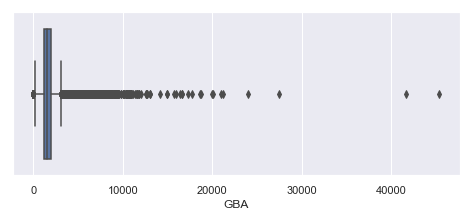

In [10]:
sns.set(rc={'figure.figsize':(8,3)})
a1=sns.boxplot(x=df['GBA'])

***
#### Residences Having More than 200 Stories
These are likely reporting errors as the there is a limit to the height of building in DC that would prevent any building being over 200 stories. This causes us to question any of the validity of the data in these observations, thus we will remove them from our data.

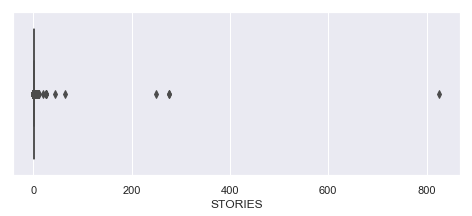

In [11]:
a2=sns.boxplot(x=df['STORIES'])

***
#### Residences Built Earlier than the year 1500
While it may be possible from some homes to be originally built prior to 1900, these earlier homes represent a very small proportion of our data. The majority of them have years reported as 50 or below. We will remove those observations from our data.

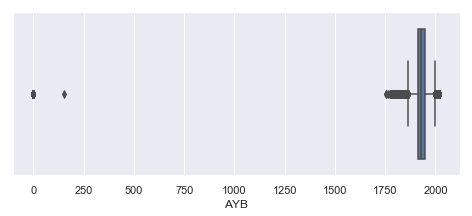

In [12]:
a3=sns.boxplot(x=df['AYB'])

***
#### Outbuildings and Vacants  
Style Dummy variables greater than 25 represent "Outbuildings" and "Vacants". We will not include these in our analysis.

***
#### Residences Having More than 20 Kitchens
There is a single home with > 20 kitchens. This appears to be a reporting error and will be excluded from analysis.

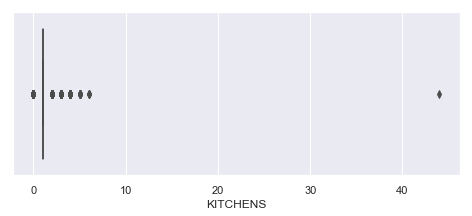

In [13]:
a4=sns.boxplot(x=df['KITCHENS'])

***
#### Residences Having More than 100 Rooms or More Bedrooms than Rooms
Based on the square footage for one home with > 100 rooms; it is likely this is a reporting error. 
Additionally, any scenario where the count of bedrooms is greater the count of rooms is impossible.

These cases will be excluded from our analysis
***

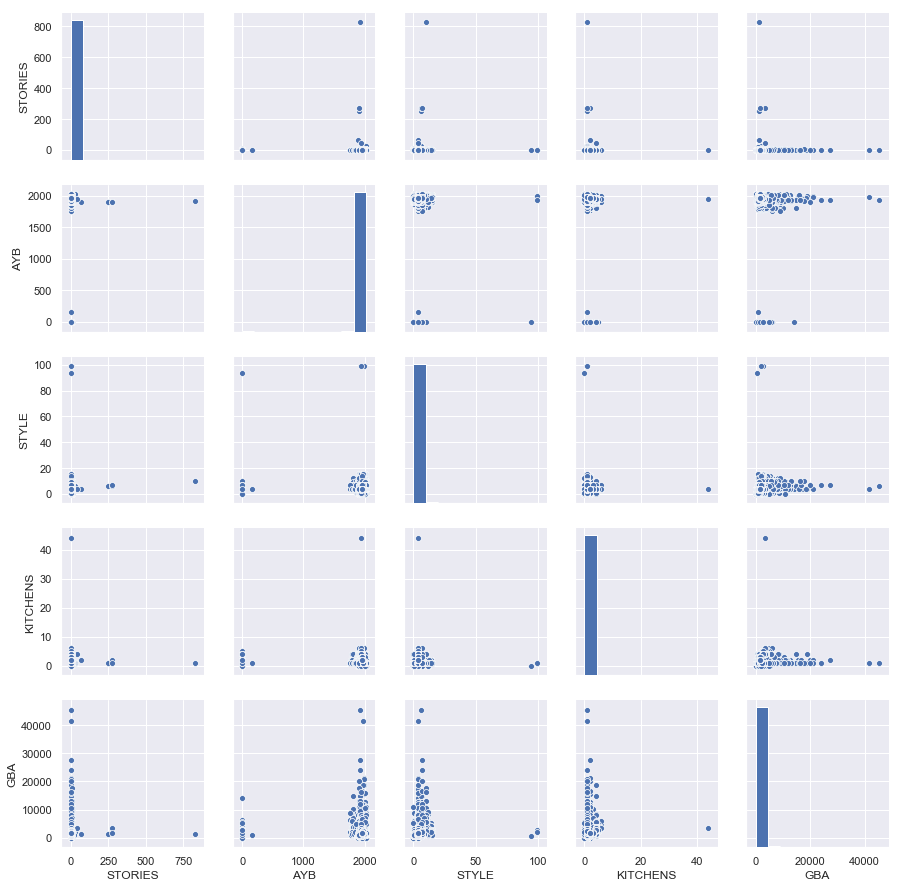

In [14]:
#Plots before outlier Removals
plotVar = ['STORIES','AYB','STYLE','KITCHENS','GBA']
a5=sns.pairplot(df[plotVar])

Below we remove outliers and replot to see *some* improvement in the distributions and correlation is more legible.

In [16]:
#remove false records and replot
df = df[df.STORIES < 200]
df = df[df.AYB > 1500]
df = df[df.STYLE < 25]
df = df[df.KITCHENS < 20]
df = df[df.ROOMS < 100]
df = df[df.ROOMS >= df.BEDRM]
df = df[df.GBA < 3200]

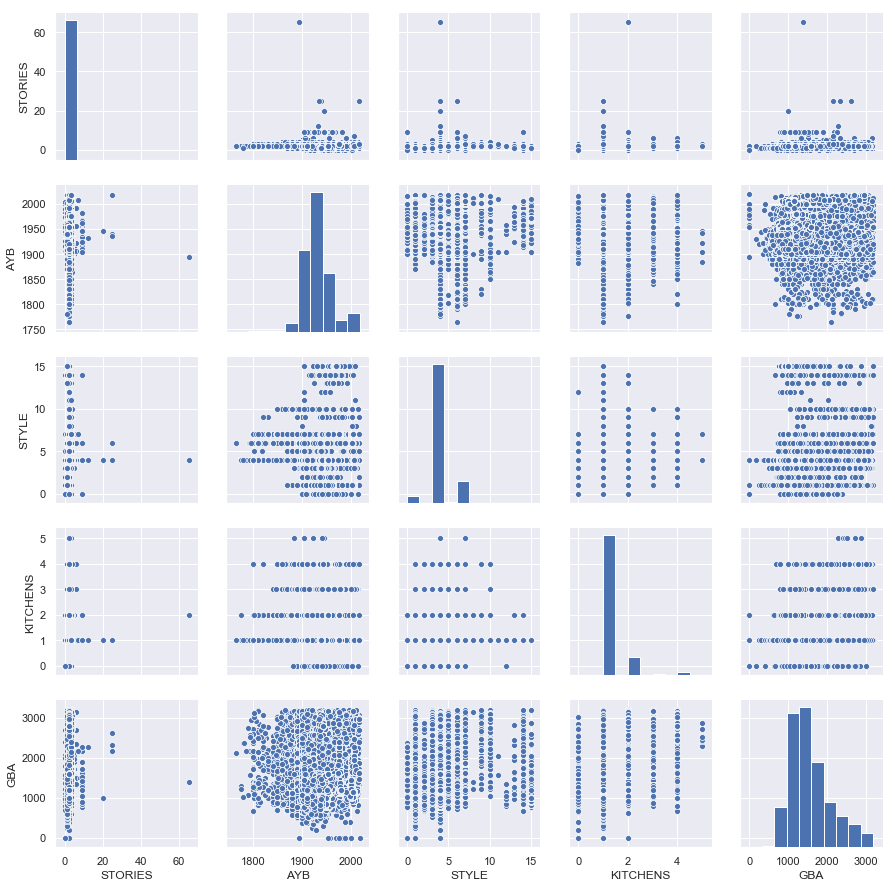

In [16]:
# Plots after outlier removal
a6=sns.pairplot(df[plotVar])

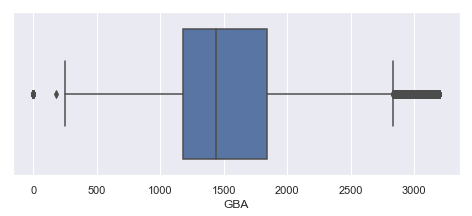

In [17]:
a7=sns.boxplot(x=df['GBA'])

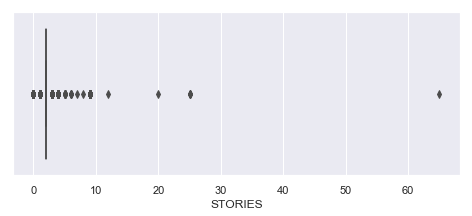

In [18]:
a8 = sns.boxplot(x=df['STORIES'])

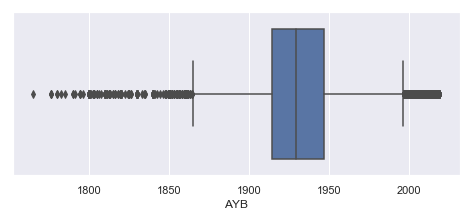

In [19]:
a9 = sns.boxplot(x=df['AYB'])

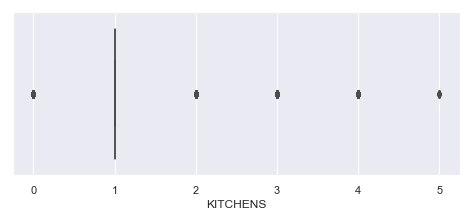

In [20]:
a10 = sns.boxplot(x=df['KITCHENS'])

***
## Data Understanding 2

To help clients understand home types in various wards we have to join the 2 datasets. This gives discrete latitude/longitude location with addresses and other attributes combined. 

Not all address information is available for all the homes; for the purposes of this analysis we will only consider homes which we have neighborhood information available.

In [17]:
# subset the variables of interest that we care about and inner join the two datasets 
df2 = df2.drop_duplicates(['SSL'], keep='last').set_index("SSL")[["LATITUDE","LONGITUDE","ASSESSMENT_NBHD","WARD"]]
df = pd.merge(df,df2,how="inner",on="SSL")

The plot below shows all of our observations by lattitude/longitude joined with addresses and other attributes combined.

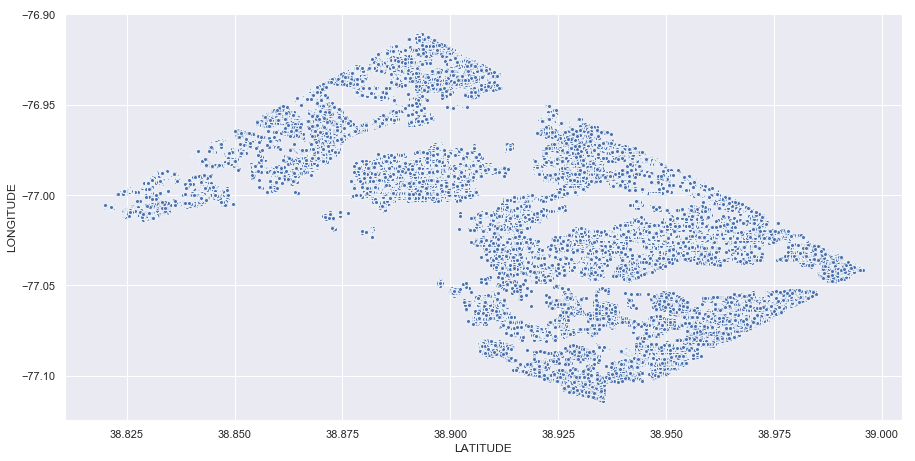

In [22]:
sns.set(rc={'figure.figsize':(15,7.5)})
a11 = sns.scatterplot(x=df.LATITUDE, y=df.LONGITUDE, data=df, s=15)
# plt.figure()
# plt.scatter(df.LATITUDE, df.LONGITUDE, cmap=plt.cm.rainbow, s=1, linewidths=0)
# plt.xlabel('Latitude'), plt.ylabel('Longitude')

***  
Below we see that the city center appears to be the most populated area in this dataset. Potentially meaning there are more homes in this area. The assumption here is that this area will have a lot of smaller properties and potentially older builds. There are also smaller clusters of homes spread around the city. The interesting part would be to identify the types homes in each of the smaller clusters.  

In [ ]:
iplot([go.Histogram2dContour(x=df.LATITUDE,y=df.LONGITUDE,xaxis = 'x', yaxis = 'y',
                             colorscale=[[0.0, 'rgb(255,255,255)'],[0.14, 'rgb(234,243,250)'],
                                         [0.29, 'rgb(217,225,242)'],[0.43, 'rgb(180,198,231)'],
                                         [0.57, 'rgb(142,169,219)'],[0.71, 'rgb(90,130,202)'],
                                         [0.86, 'rgb(48,84,150)'],[1, 'rgb(40,70,124)']],
                             contours=dict(coloring='heatmap'),colorbar=dict(title='Housing Density'))],show_link=False)

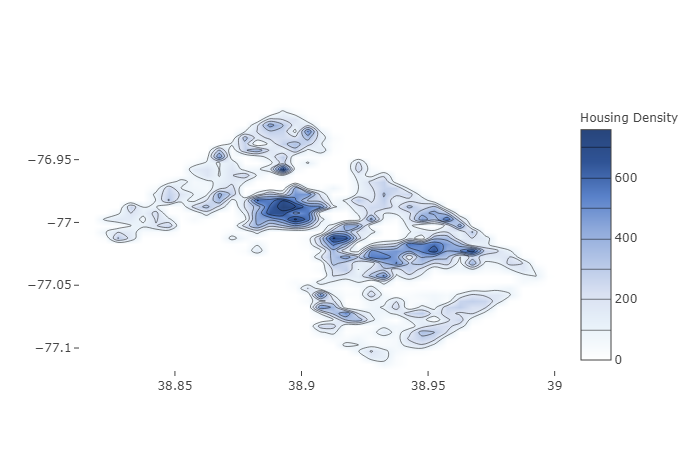

In [25]:
from IPython.display import Image
Image("Data/Plot of All.png")

In order to better understand the different types of homes in our data set we will try to see if they cluster cleanly into different groups. The final step of our data prep is to prepare our data for clustering. As GBA is a much larger number than the rest of the values in our data set we will scale the data in order to not let GBA drive a lot of the clustering decisions.

We also one hot-encode any of our categorical variables.

Finally, due to the size of our data we have chosen to use a small sample of 10,000 observations for clustering the results. Once we identify a clustering that is ideal for this data on the sample, we can implement that cluster by training a classifier on that data. We will discuss this further in the implementation portion.

In [18]:
from sklearn.preprocessing import StandardScaler
# select vars for clustering
clusVar = ['BATHRM','BEDRM','ROOMS','AYB','GBA','STRUCT','LATITUDE','LONGITUDE']
clus = df[clusVar].sample(n=10000)
#one hot encode categorical
catvar = ['STRUCT']
tmp_df1 = pd.get_dummies(clus[catvar].astype(str))
clus = pd.concat((clus,tmp_df1),axis=1)
# Delete unnecessary attributes
clus.drop(['STRUCT'], axis=1, inplace=True)
clus.info()
scl_obj = StandardScaler()
scl_obj.fit(clus)
tmp = scl_obj.transform(clus)
tmp.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 63800 to 96539
Data columns (total 14 columns):
BATHRM       10000 non-null int64
BEDRM        10000 non-null int64
ROOMS        10000 non-null int64
AYB          10000 non-null int64
GBA          10000 non-null int64
LATITUDE     10000 non-null float64
LONGITUDE    10000 non-null float64
STRUCT_1     10000 non-null uint8
STRUCT_2     10000 non-null uint8
STRUCT_4     10000 non-null uint8
STRUCT_5     10000 non-null uint8
STRUCT_6     10000 non-null uint8
STRUCT_7     10000 non-null uint8
STRUCT_8     10000 non-null uint8
dtypes: float64(2), int64(5), uint8(7)
memory usage: 693.4 KB


(10000, 14)

Below we can see number of homes by ward. Ward 4 having the most and ward 2 the least.

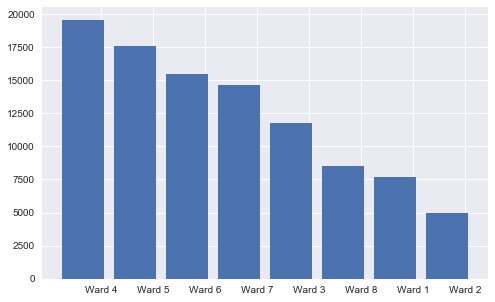

In [19]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(style="darkgrid")
from collections import Counter
counts = Counter(df.WARD)
labels, values = zip(*counts.items())
# sort values in descending order
indSort = np.argsort(values)[::-1]
# rearrange data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.35
plt.bar(indexes, values)
# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [ ]:
# Generate interactive 3d scatter plot
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)','rgb(176,74,166)',
          'rgb(74,74,176)','rgb(93,240,250)','rgb(224,250,93)','rgb(250,146,93)']
for i in range(len(df['WARD'].unique())):
    name = df['WARD'].unique()[i]
    color = colors[i]
    x = df[ df['WARD'] == name ]['LATITUDE']
    y = df[ df['WARD'] == name ]['LONGITUDE']
    z = df[ df['WARD'] == name ]['AYB']
    trace = dict(name = name,x = x, y = y, z = z,type = "scatter3d",mode = 'markers',
                 marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )
    cluster = dict(color = color,opacity = 0.3,type = "mesh3d",x = x, y = y, z = z )
    data.append( cluster )
layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Wards dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,backgroundcolor='rgb(230, 230,230)'),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,backgroundcolor='rgb(230, 230,230)'),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,backgroundcolor='rgb(230, 230,230)'),
        aspectratio = dict( x=1, y=1, z=0.7 ), aspectmode = 'manual'),)
fig = dict(data=data,layout=layout)
url = py.plot(fig,filename='pandas-3d-scatter-Wards_1',validate=False)

Below we can see geo location by year built by ward.
This tells us that wards 2 and 6 have the more historic residences while ward 7 looks to be more modern.  

__Top Down Perspective:__

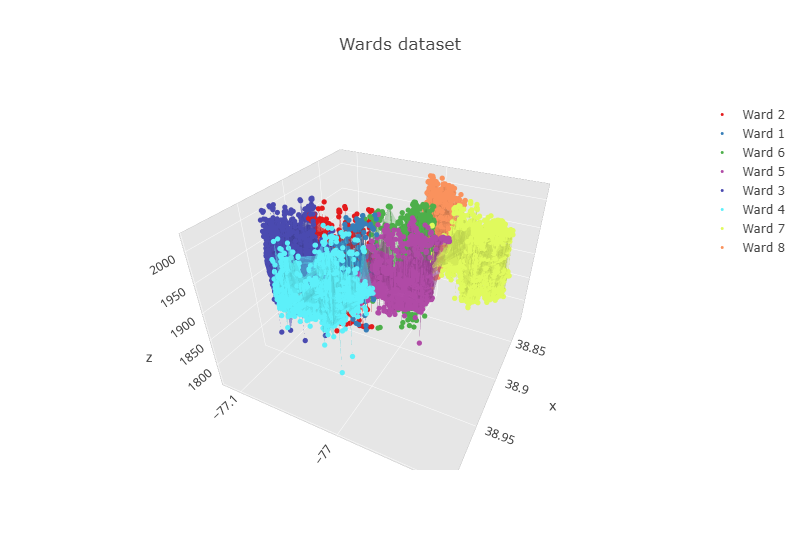

In [26]:
from IPython.display import Image
Image("Data/Top Down.png")

__Bottom Up Perspective:__

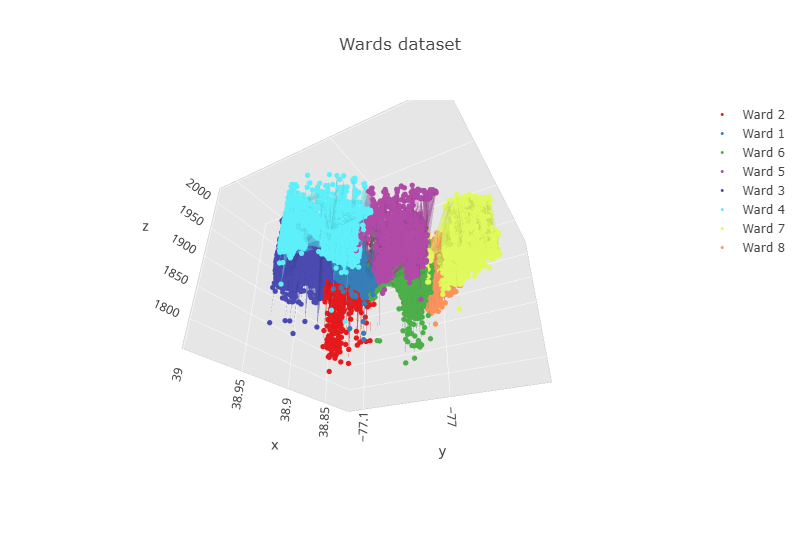

In [27]:
Image("Data/BottomUp.png")

__Realtime interactive 3d scatter plot:__  https://plot.ly/~otanyuk/0  

***
## Modeling and Evaluation 1  
### K-Means  
Below we use KMeans clustering on the BATHRM, BEDRM, ROOMS, AYB, GBA, STRUCT%, LATITUDE and LONGITUDE features. We can see that 5 clusters are ideal based on silhouette score and sample size of each cluster, we will move forward with it to and see if we gain more understanding of the data.

In [20]:
# do it for the k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [3,5,7,9,11]
for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans_model.fit_predict(tmp)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(tmp, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", round(silhouette_avg,2)         )

For n_clusters = 3 The average silhouette_score is : 0.19
For n_clusters = 5 The average silhouette_score is : 0.31
For n_clusters = 7 The average silhouette_score is : 0.32
For n_clusters = 9 The average silhouette_score is : 0.31
For n_clusters = 11 The average silhouette_score is : 0.32


In [21]:
# do it for the k-means
from sklearn.cluster import KMeans
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, init="k-means++").fit(tmp)
labels = kmeans_model.labels_
clus['cluster'] = labels
clus.cluster.value_counts()

2    3921
1    2881
0    1644
4    1166
3     388
Name: cluster, dtype: int64

### DBSCAN  
We initially tested DBSCAN with much broader ranges of eps and mpts. Below we show our narrowed ranges 3-10 eps to find that eps = 7 and mpts = 100 seems ideal based on onlythe average silhouette score 0.85.

In [27]:
%%time
# trying DBSCAN.
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
for eps in [3,5,7,10]:
    for mpts in [100,500,1000]:
        DBSCAN_cluster_labels = DBSCAN(eps=eps, min_samples=mpts).fit_predict(tmp)
        silhouette_avg = silhouette_score(tmp, DBSCAN_cluster_labels)
        print("For eps =", eps,
          "For mpts =", mpts,
          "The average silhouette_score is :", round(silhouette_avg,2))#,
         #"Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2)

For eps = 3 For mpts = 100 The average silhouette_score is : 0.31
For eps = 3 For mpts = 500 The average silhouette_score is : 0.3
For eps = 3 For mpts = 1000 The average silhouette_score is : 0.26
For eps = 5 For mpts = 100 The average silhouette_score is : 0.42
For eps = 5 For mpts = 500 The average silhouette_score is : 0.5
For eps = 5 For mpts = 1000 The average silhouette_score is : 0.5
For eps = 7 For mpts = 100 The average silhouette_score is : 0.83
For eps = 7 For mpts = 500 The average silhouette_score is : 0.83
For eps = 7 For mpts = 1000 The average silhouette_score is : 0.83
For eps = 10 For mpts = 100 The average silhouette_score is : 0.83
For eps = 10 For mpts = 500 The average silhouette_score is : 0.83
For eps = 10 For mpts = 1000 The average silhouette_score is : 0.83
Wall time: 2min 29s


However looking at the number of clusters below we aren't gaining very useful information.

In [28]:
%%time
DBSCAN_model = DBSCAN(eps=7, min_samples=100).fit(tmp)
DBSCAN_labels = DBSCAN_model.labels_
print('Clustering Counts for eps of 7')
clus['DBSCAN_cluster'] = DBSCAN_labels
display(clus.DBSCAN_cluster.value_counts())

Clustering Counts for eps of 7


 0    9968
-1      32
Name: DBSCAN_cluster, dtype: int64

Wall time: 12.1 s


__Selected DBSCAN Model__  
Higher eps aggregated so much as to be meaningless while lower had too many clusters.
We do find that eps=3 below produces somewhat useful information based on the sizes of the clusters.

In [29]:
DBSCAN_model = DBSCAN(eps=3, min_samples=100).fit(tmp)
DBSCAN_labels = DBSCAN_model.labels_
print('Clustering Counts for eps of 3')
clus['DBSCAN_cluster'] = DBSCAN_labels
display(clus.DBSCAN_cluster.value_counts())

Clustering Counts for eps of 3


 0    3979
 2    2774
 1    1636
 3    1186
 4     360
-1      65
Name: DBSCAN_cluster, dtype: int64

### Agglomerative

In [30]:
%%time
import warnings
warnings.simplefilter('ignore', UserWarning)
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_samples, silhouette_score
knn_graph = kneighbors_graph(tmp, 30, include_self=False)
# Use of knn_Graph for connectivity improved silhouette score for c_clusters 4 - 11.
for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:  #'ward', 
    for n_cls in [3,4,5,7,11]:
        # Fit model and get labels
        cls_agg_labels = AgglomerativeClustering(n_clusters=n_cls, connectivity=knn_graph,affinity = affinity, linkage='complete' ).fit_predict(tmp)#linkage=link
        # get the silhouette score
        silhouette_avg = silhouette_score(tmp, cls_agg_labels)
        # Output
        print ("For affinity of ", affinity, "and number of clusters = ", n_cls, \
               ":  The Average Silhouette Score is ", silhouette_avg)#Linkage type = ", link,

For affinity of  euclidean and number of clusters =  3 :  The Average Silhouette Score is  0.8604592090306323
For affinity of  euclidean and number of clusters =  4 :  The Average Silhouette Score is  0.7891970938066242
For affinity of  euclidean and number of clusters =  5 :  The Average Silhouette Score is  0.7888788256831663
For affinity of  euclidean and number of clusters =  7 :  The Average Silhouette Score is  0.5737698229930538
For affinity of  euclidean and number of clusters =  11 :  The Average Silhouette Score is  0.3756272425180791
For affinity of  l1 and number of clusters =  3 :  The Average Silhouette Score is  0.8604592090306323
For affinity of  l1 and number of clusters =  4 :  The Average Silhouette Score is  0.7891970938066242
For affinity of  l1 and number of clusters =  5 :  The Average Silhouette Score is  0.5749764438533482
For affinity of  l1 and number of clusters =  7 :  The Average Silhouette Score is  0.31986531918673733
For affinity of  l1 and number of cl

Affinity (Excluding Ward) does not seem to have much of an effect on the model, but number of clusters does.

In [31]:
%%time 
for n_cls in [3,4,5,7,11]:
    agg_model = AgglomerativeClustering(n_clusters=n_cls, connectivity=knn_graph, linkage='ward').fit(tmp)
    Agg_labels = agg_model.labels_
    silhouette_avg = silhouette_score(tmp, Agg_labels)
    print('Clustering Counts for ', n_cls, 'clusters')
    print('Silhouette Score is ', silhouette_avg)
    clus['Agg_cluster'] = Agg_labels
    display(clus.Agg_cluster.value_counts())

Clustering Counts for  3 clusters
Silhouette Score is  0.22616930467131482


0    4375
2    2838
1    2787
Name: Agg_cluster, dtype: int64

Clustering Counts for  4 clusters
Silhouette Score is  0.25159240557471774


2    4003
0    2838
1    2787
3     372
Name: Agg_cluster, dtype: int64

Clustering Counts for  5 clusters
Silhouette Score is  0.30805417451067935


0    4003
1    2787
2    1644
4    1194
3     372
Name: Agg_cluster, dtype: int64

Clustering Counts for  7 clusters
Silhouette Score is  0.3145933171980833


1    3981
2    2778
0    1644
4    1194
3     372
5      22
6       9
Name: Agg_cluster, dtype: int64

Clustering Counts for  11 clusters
Silhouette Score is  0.28674259567317406


0     3448
1     1623
4     1194
8     1155
2      936
10     707
9      533
3      372
5       22
6        9
7        1
Name: Agg_cluster, dtype: int64

Wall time: 54.6 s


With Ward algorithm, silhouette score is lower, but clusters are prettey evenly sized.

In [32]:
%%time
for n_cls in [3,4,5,7,11]:
    agg_model = AgglomerativeClustering(n_clusters=n_cls, connectivity=knn_graph, linkage='complete').fit(tmp)
    Agg_labels = agg_model.labels_
    silhouette_avg = silhouette_score(tmp, Agg_labels)
    print('Clustering Counts for ', n_cls, 'clusters')
    print('Silhouette Score is ', silhouette_avg)
    clus['Agg_cluster'] = Agg_labels
    display(clus.Agg_cluster.value_counts())

Clustering Counts for  3 clusters
Silhouette Score is  0.8604592090306323


0    9990
2       9
1       1
Name: Agg_cluster, dtype: int64

Clustering Counts for  4 clusters
Silhouette Score is  0.7891970938066242


2    9968
1      22
0       9
3       1
Name: Agg_cluster, dtype: int64

Clustering Counts for  5 clusters
Silhouette Score is  0.7888788256831663


0    9968
1      22
2       8
4       1
3       1
Name: Agg_cluster, dtype: int64

Clustering Counts for  7 clusters
Silhouette Score is  0.5737698229930538


0    9967
1      19
2       8
6       3
5       1
4       1
3       1
Name: Agg_cluster, dtype: int64

Clustering Counts for  11 clusters
Silhouette Score is  0.3756272425180791


0     9590
3      371
1       19
2        8
6        3
4        3
8        2
7        1
5        1
10       1
9        1
Name: Agg_cluster, dtype: int64

Wall time: 54.9 s


Without Ward's Algorithm, Silhouette is higher, but that appears distorted by the fact that there is really only one cluster.  

__Selected Agglomerative Model__

In [33]:
# Best Agglomerative Model
Agg_n_custers = 5
Agg_model = AgglomerativeClustering(n_clusters=Agg_n_custers, connectivity=knn_graph, linkage='ward').fit(tmp)
Agg_labels = Agg_model.labels_
silhouette_avg = silhouette_score(tmp, Agg_labels)
print('Clustering Counts for ', n_clusters, 'clusters')
print('Silhouette Score is ', silhouette_avg)
clus['Agg_cluster'] = Agg_labels
display(clus.Agg_cluster.value_counts())

Clustering Counts for  5 clusters
Silhouette Score is  0.30805417451067935


0    4003
1    2787
2    1644
4    1194
3     372
Name: Agg_cluster, dtype: int64

***
## Modeling and Evaluation 2  
### K-Means  
From Modeling and Evaluation 1 we were able to determine, the appropriate number of clusters for BATHRM, BEDRM, ROOMS, AYB, GBA, STRUCT, LATITUDE, LONGITUDE is 5 using K-Means Clustering. This was judged by assessing the silhoette scores for each of the clusters. 

In order to better asses these clusters we now look at the silhouette scores between clusters as well as a plot of the clusters based on there first 2 principle components. Those 2 only explain ~33% of the variability in the data but hopefully these should give us an idea of how well the component seperated.

In [22]:
from sklearn import decomposition
# use the same vars to get the 2 primary pca for plottting
pca = decomposition.PCA(n_components=2)
pca.fit(tmp)
pc_1 = pca.transform(tmp)
#join thos PCA with the sample clustering set
clus['pc1'] = pc_1[:,0]
clus['pc2'] = pc_1[:,1]
print("Explained Variance: ", pca.explained_variance_ratio_ )

Explained Variance:  [0.23597616 0.12104323]


Text(0.5,0.98,'Silhouette analysis for KMeans clustering on sample data with n_clusters = 5')

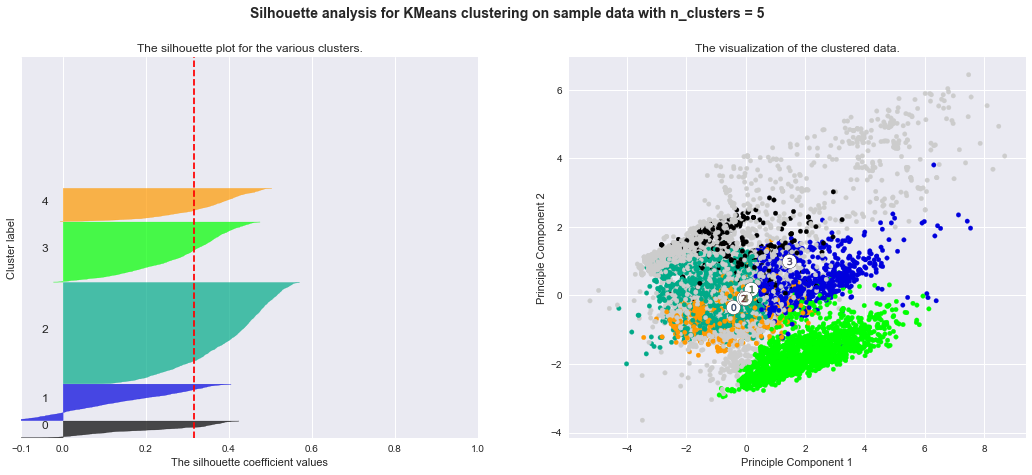

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(tmp) + (n_clusters + 1) * 10])
silhouette_avg = silhouette_score(tmp, cluster_labels)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(tmp, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(clus['pc1'], clus['pc2'], s=20,c=colors)
# Labeling the clusters
centers = kmeans_model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Principle Component 1")
ax2.set_ylabel("Principle Component 2")
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
             "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

The two plots above show two means of evaluating our cluster. The plot of the left shows the silhouette coefficient for each of the observations in assigned to each of the clusters. Ideally all of these would be as close to 1 as possible. Negative values would indicate that observation could have been clustered incorrectly or easily clustered into another class. So for above we see that cluster 1 is potentially not a very good cluster from this set, and indication that this may not be a good clustering.

The width of the bars indicate the number of observations assigned to each cluster. Which in this case we see some inequality among the different classes with cluster 1 and 4 being relatively narrow.

Then finally the red bar on the left plot shows the average silhouette score for all observations. For this set it appears to be at .31 but we do see some negative values for cluster 1 and 3 which indicates that his may not be a good clustering.

The plot on the right shows how the clusters are separated when using the first 2 principle components. Ideally we would see 5 distinct groupings. Also on that plot is the cluster centers. Again ideally these would be much farther apart indicating the clusters are clearly separable, however we see that some are right on top each other.

Overall the above shows that this clustering is not ideal. However, these clusters can better be evaluated using a more qualitative method, which we'll explore below.

***
### DBSCAN

Text(0.5,0.98,'Silhouette analysis for DBSCAN clustering on sample data with eps = 10 and mips = ')

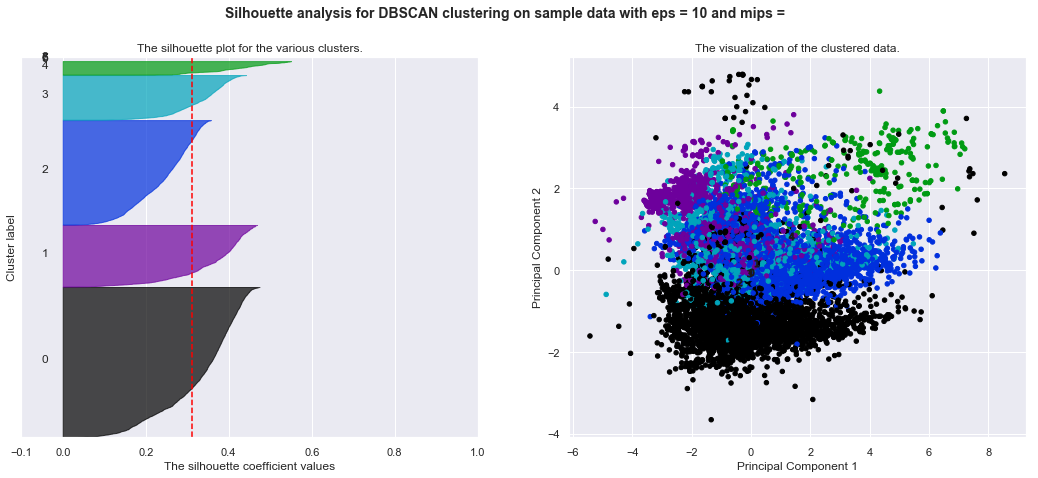

In [37]:
## NEED TO ADD MIPS TO TITLE?
## NOT SURE WHAT TO DO WITH (loop for i in range clusters)
DBSCAN_n_clusters = 9
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(tmp) + (DBSCAN_n_clusters + 1) * 10])
silhouette_avg = silhouette_score(tmp, DBSCAN_labels)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(tmp, DBSCAN_labels)
y_lower = 10
for i in range(DBSCAN_n_clusters): ####  Not sure what to do with this!!!!
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[DBSCAN_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / DBSCAN_n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(DBSCAN_labels.astype(float) / DBSCAN_n_clusters)
ax2.scatter(clus['pc1'], clus['pc2'], s=20,c=colors)
# Labeling the clusters
#centers = kmeans_model.cluster_centers_
# Draw white circles at cluster centers
#ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#           c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.suptitle(("Silhouette analysis for DBSCAN clustering on sample data "
             "with eps = %d and mips = " % eps), fontsize=14, fontweight='bold')

While overall Silhouette score is simitar to KMeans, Cluster four is lower that the other.  Visual inspection of clustering may be more concentrated than KMeans, but clusters still seem to overlap meaningfully.

 ### Analysis Plots for Agglomerative Clustering

Based on the silhouette plots below agglomerative with 5 clusters is not ideal as we have one cluster below average.

Text(0.5,0.98,'Silhouette analysis for Agglomerative Clustering on sample data with n_clusters = 5')

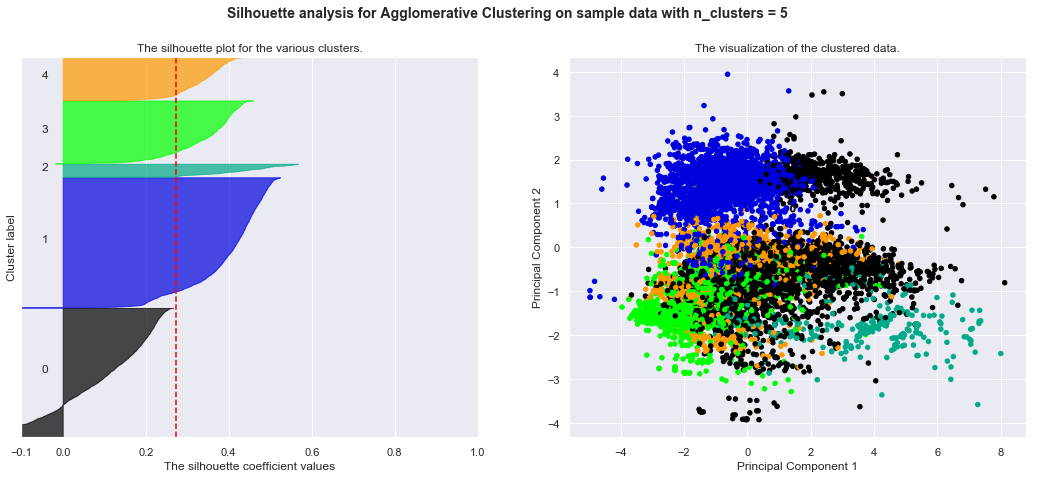

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(tmp) + (Agg_n_clusters + 1) * 10])
silhouette_avg = silhouette_score(tmp, Agg_labels)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(tmp, Agg_labels)
y_lower = 10
for i in range(Agg_n_clusters): ####  Not sure what to do with this!!!!
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[Agg_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / Agg_n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(Agg_labels.astype(float) / Agg_n_clusters)
ax2.scatter(clus['pc1'], clus['pc2'], s=20,c=colors)
# Labeling the clusters
#centers = kmeans_model.cluster_centers_
# Draw white circles at cluster centers
#ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
             "with n_clusters = %d" % Agg_n_clusters),fontsize=14, fontweight='bold')

Overall Silhouettes score of .31 is in line with the others, but Cluster 0, which is relatively large, has a low peak and a noticeable number of observations with negative scores.  This cluster appears as two distinct groups on the plot.

***
## Modeling and Evaluation 3

### K-means  
From above we can see that three models we compared performed similarly when evaluating them based on the silhouette scores and a visual inspection of the clusters. As no model appeared to perform noticeably better than the others we have decided to move forward with the K-means model. In this section we will more thoroughly evaluate the clusters and assess if the groupings make sense based on the feature differences between the clusters.

In [ ]:
for c in range(n_clusters):
    data = clus[clus.cluster == c]
    print("Plot of Cluster %d" % c)
    x = data.LATITUDE
    y = data.LONGITUDE
    iplot([go.Histogram2dContour(x=x, y=y,
                                 colorscale=[[0.0,'rgb(255,255,255)'],[0.14, 'rgb(234,243,250)'],
                                                      [0.29, 'rgb(217,225,242)'],[0.43, 'rgb(180,198,231)'],
                                                      [0.86, 'rgb(48,84,150)'],[1, 'rgb(40,70,124)']],
                                 contours=dict(coloring='heatmap'),colorbar=dict(title='Housing Density'))],show_link=False)

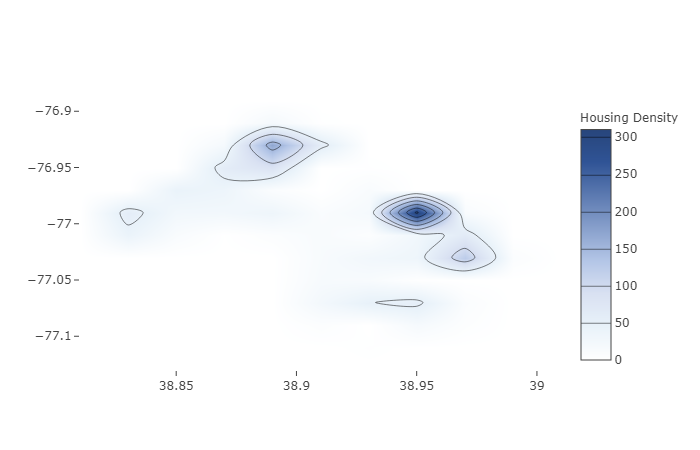

In [26]:
#Offline Cluster 0
Image("Data/Plot of Cluster 0.png")

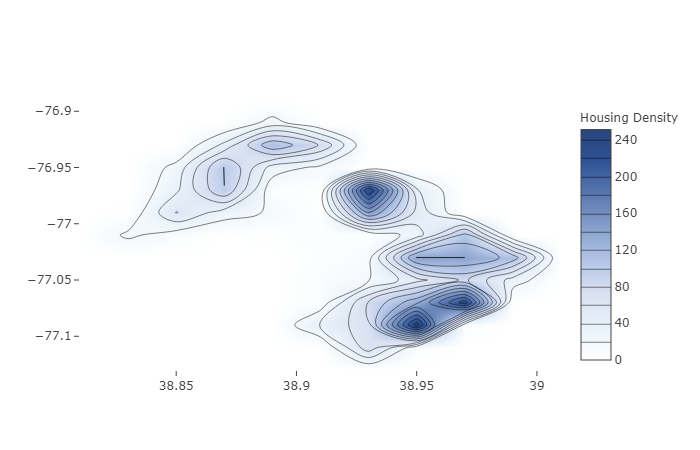

In [27]:
#Offline Cluster 1
Image("Data/Plot of Cluster 1.png")

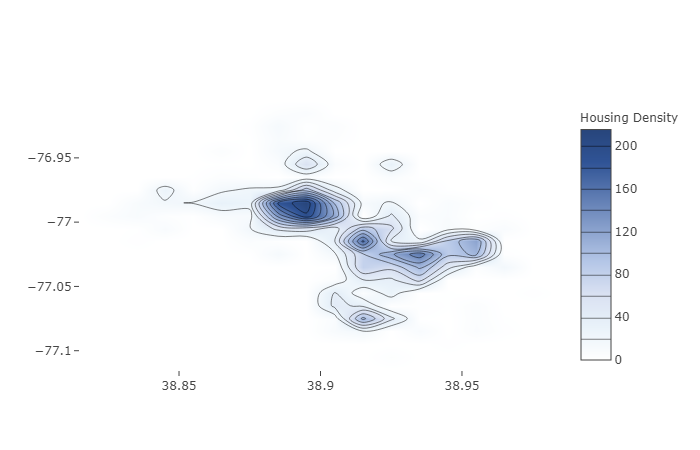

In [28]:
#Offline Cluster 2
Image("Data/Plot of Cluster 2.png")

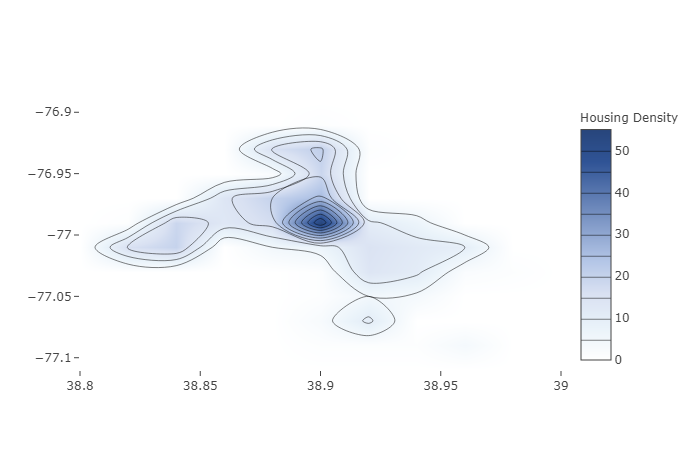

In [29]:
#Offline Cluster 3
Image("Data/Plot of Cluster 3.png")

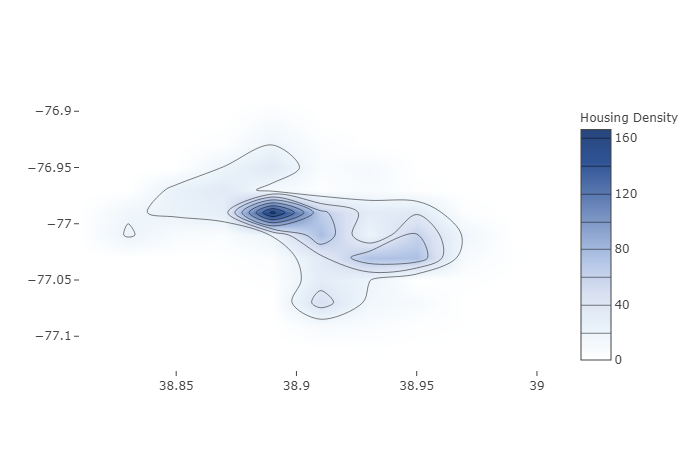

In [30]:
#Offline Cluster 4
Image("Data/Plot of Cluster 4.png")

__Clusters 0, 3, & 4__ seem to focus around the city center. This may be a result of the number of observations in this area. Further explortation of the different home types between them should provide more insights.

__Cluster 1__ appears to be made up of a lot of homes in the northen outskirts of the city. This would include neighborhoods like Brentwood and Catholic university. When looking at the spread accross various neighborhoods in this cluster supports that this potentially is not a good cluster for our data.

__Cluster 2__ is largely populated with homes in the western & eastern corner of the city. These are actually pretty different neighborhoods, but the clusters focus on that specific geographic area so perhaps the home types will provide more insights.  
***
Now that we have evaluated the K-means model by they geographic location, lets look at some of the other continous variables in between clusters and see how the model seperated them.  

Below we see that cluster 2 appears to be made of up larger homes than the other 4 groups. We also see cluster 4 is made up of some of the smaller homes, perhaps explaining some of the difference between cluster 0 & 3 which populates a lot of the same area..

When looking at the AYB, homes in cluster 2 do appear to be a little newer, where homes in cluster 0 appear to be a little older. This makes sense when paired with the location information above. As Cluster 2 is largely made up of homes on the outskirts of town then would have been built later as the city was growing. Cluster 0 is right in the city center where many of the first homes would have been built.  

<Figure size 360x360 with 0 Axes>

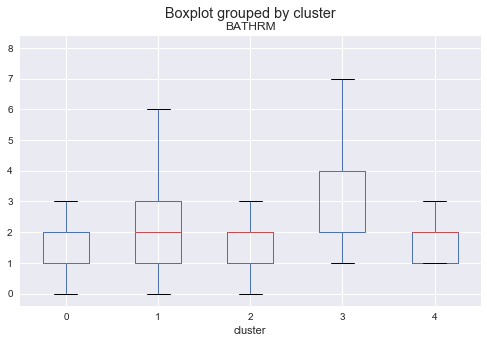

<Figure size 360x360 with 0 Axes>

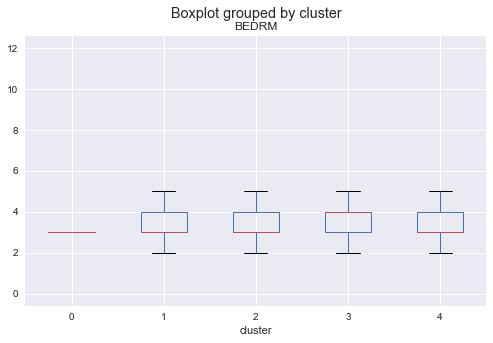

<Figure size 360x360 with 0 Axes>

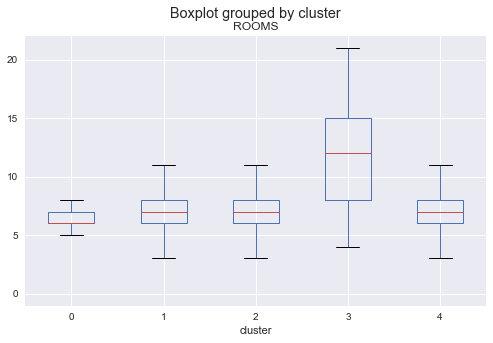

<Figure size 360x360 with 0 Axes>

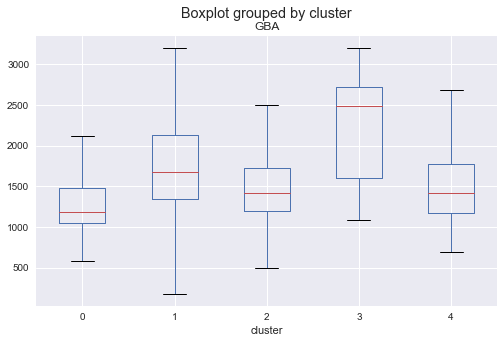

<Figure size 360x360 with 0 Axes>

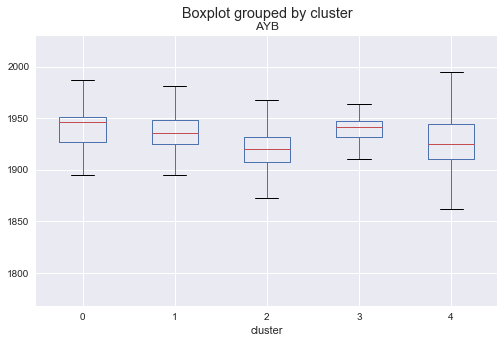

In [31]:
# manually set the continuous variables to compare
vars_to_plot_separate = [['BATHRM'],['BEDRM'],['ROOMS'],['GBA'],['AYB']]
# box plot by all clusters
for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(5, 5))
    ax = clus.boxplot(column=plot_vars, by='cluster')
plt.show()

Next we will evaluate how the different categorical varables were clustered out.

In [32]:
tmp_df = pd.concat((clus['cluster'],tmp_df1),axis=1)
tmp_df.head()
clusterStat = tmp_df.groupby(['cluster']).mean().T
# clusterStat
clusterStat = (clusterStat*100).astype('int64')

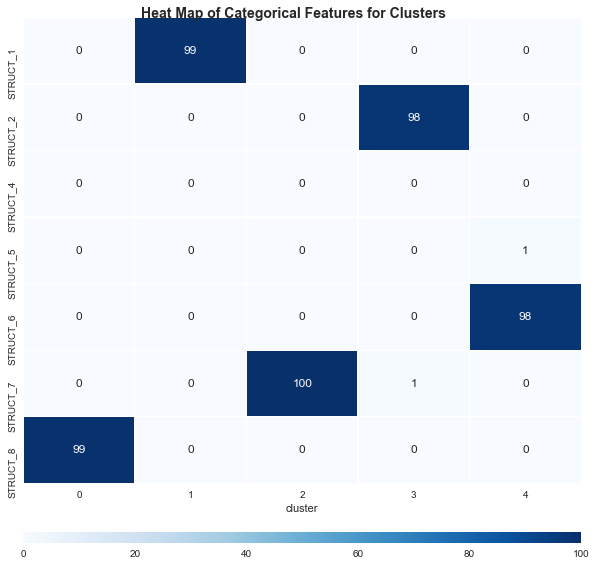

In [33]:
fig3, ax = plt.subplots(figsize=(10, 10))
fig3.subplots_adjust(top=.965)
plt.suptitle('Heat Map of Categorical Features for Clusters', fontsize=14, fontweight='bold',)
cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sns.heatmap(clusterStat, annot=True, fmt='d', linewidths=.3, ax=ax, cmap='Blues', cbar_kws=cbar_kws)

From above it seems that the clustering picked out the the specific structure type for each of the clusters:

- Cluster 0 begin made up of row homes, which given its relative location to the city center makes sense.  
- Cluster 1 is made up of single family homes. This cluster is largely represented towards the outskirts of town, in what is likely a more suburban area.  
- Cluster 2 is almost entirely multi-family homes. Considering the focused location of this cluster and size of this cluster it represents a relatively small portion of the overall data set.  
- Cluster 3 is row end homes, so essentially only has a single neighbor on one side. Given the overall similarities between - - - Cluster 0 & 3 this seems to be one of the only differentiators.  
- Cluster 4 is semi-detached homes. Given that this group is largely smaller newer builds perhaps this type of style.  

***
## Modeling and Evaluation 4  
Using clustering algorithms as a means for unsupervised learning has not provided meaningful insights so far.  The separation appears largely due to the kind of property, and these algorithms were not necessary to segment the data set on this variable.  Silhouette scores in the 30% range also indicate that the grouping is not very strong.

Silhouette scores were consistent across algorithms, and visual inspections of cluster plots did not seem encouraging.  It should be noted that the PCA used to make the plots only accounted for about 33% of the variability in the data.

 

Also, in order to more fully evaluate the effectiveness of the algorithms, one should also compare them in terms of how well their clusters can be described in terms of the attributes of the properties in the clusters.  The review done in Modelling and Evaluation 3 of the attributes across the clusters should also be done for the DBSCAN and Agglomerative algorithms.

 

One could continue this work by making the following adjustments:

- Exclude latitude and longitude from the attributes considered.

- Exclude either Rooms or Bedrooms from the attributes considered.

- Create new variables (e.g. Total Rooms - Bedrooms and Bathrooms) in an attempt to improve performance.

 

Finally, while the intent of the analysis was to test the algorithms in pure unsupervised learning, given the results, discussion of the data set with subject matter experts may also spark some thoughts on which attributes to use, or whether to derive new ones.

 

Some discussion is also warranted with respect to the fact that we used a random sample of 10,000 observations out of a population of 100,000 for this analysis.

We believe that the choice of 10,000 is reasonable.  We used a normal distribution to test the probability of a difference in sample proportions as a guide in selecting this sample size.  Using:

- an expected sample proportion of 50% to be conservative,

- a population size of 100,000.

- A Margin of Error of 1%.

 

These assumptions would imply a sample size of approximately 14,300 for 99% confidence, and 8,800 for 95% confidence, so our sample of 10,000 seems reasonable.

 

As a next step, sample size could be increased, but if this line of thought were to be pursued further, making adjustments to the variables and the models should be pursued first.

***
## Deployment

The clusters above would need to be reviewed and determined whether they are sufficient. In this case the realty team that would need to review the findings and determine if clusters identified are in line with how they thing about homes or would generate potential lists of homes for home buyers. 

If the clusterings are identified to be sufficient on deployment strategy would to then use those clusterings determined by the sample as a labeled class. Using the labeled classes in the sample set could train a classifier that would accurately predict the labels. This model would allow us to easily classify the remaining homes in our set without requiring excessive amounts of computational resources. Additionally, it would provide a model for classifying all new homes as they enter into the database, without having to re-cluster the entire database each time a new home is added.

Then the final labeled dataset and the corresponding information could be loaded into a local database. Ideally, a simple dashboard or interface could be developed using Tableau or some other visualization software. This would provide the agents a means to explore the homes and carefully & quickly curate a list of homes for potential buyers. 

***
## Exceptional Work  
Let us use clustering in order to improve logistic regression model accuracy. We are going to predict neighborhood.  

#### Baseline Classification Performance

In [51]:
# perform one-hot encoding of the categorical data and delete columns that we do not need for modeling
tmp_df2 = pd.get_dummies(df.WARD,prefix='WARD')
tmp_df3 = pd.get_dummies(df.YR_RMDL_ClASS,prefix='YR_RMDL_ClASS')
df_imputed = pd.concat((df,tmp_df3,tmp_df2),axis=1) # add back into the dataframe
df_imputed.drop(['OBJECTID','SSL','YR_RMDL_ClASS','ASSESSMENT_NBHD','WARD'], axis=1, inplace=True)
#Lets do mapping fo AC column
mapping = {'Y': 1, 'N': -1}
df_imputed = df_imputed.replace({'AC': mapping})
df_imputed.head(5)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,STORIES,SALE_NUM,...,YR_RMDL_ClASS_50+,YR_RMDL_ClASS_NONE,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,4,0,7,1,2,8,4,1910,3,1,...,0,0,0,1,0,0,0,0,0,0
1,3,1,7,1,2,11,5,1898,3,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,13,1,2,9,5,1910,3,3,...,0,0,0,1,0,0,0,0,0,0
3,3,1,13,1,2,8,5,1900,3,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,7,1,2,5,2,1917,2,1,...,0,0,0,1,0,0,0,0,0,0


In [52]:
df_imputed['AC']=df_imputed['AC'].astype(np.int64)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100096 entries, 0 to 100095
Data columns (total 37 columns):
BATHRM                100096 non-null int64
HF_BATHRM             100096 non-null int64
HEAT                  100096 non-null int64
AC                    100096 non-null int64
NUM_UNITS             100096 non-null int64
ROOMS                 100096 non-null int64
BEDRM                 100096 non-null int64
AYB                   100096 non-null int64
STORIES               100096 non-null int64
SALE_NUM              100096 non-null int64
GBA                   100096 non-null int64
STYLE                 100096 non-null int64
STRUCT                100096 non-null int64
EXTWALL               100096 non-null int64
ROOF                  100096 non-null int64
INTWALL               100096 non-null int64
KITCHENS              100096 non-null int64
FIREPLACES            100096 non-null int64
LANDAREA              100096 non-null int64
LATITUDE              100096 non-null float64
LONGITU

In [53]:
#Lets normalize the data
df_temp = (df_imputed-df_imputed.mean())/df_imputed.std()
df_final = pd.concat([df_temp, df.ASSESSMENT_NBHD], axis=1)

In [54]:
# run logistic regression and vary some parameters using sample of 10,000 obs
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

df = df_final.sample(15000)
# we want to predict the X and y data as follows:
if 'ASSESSMENT_NBHD' in df:
    y = df['ASSESSMENT_NBHD'].values # get the labels we want
    del df['ASSESSMENT_NBHD'] # get rid of the class label
    X = df.values # use everything else to predict!

cv = StratifiedKFold(n_splits=5)

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

acc = cross_val_score(lr_clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  74.40819239529979 +- 0.32209659728841594


Now let's start with a bit of feature engineering. The first clustering method that we are going to use is KMeans. We are going to make clusters for LATITUDE and LONGITUDE.

For n_clusters = 7 The average silhouette_score is : 0.45 Average accuracy (with kmeans for LATITUDE/LONGITUDE)=  78.62 +- 0.35
For n_clusters = 8 The average silhouette_score is : 0.47 Average accuracy (with kmeans for LATITUDE/LONGITUDE)=  81.26 +- 0.29
For n_clusters = 9 The average silhouette_score is : 0.47 Average accuracy (with kmeans for LATITUDE/LONGITUDE)=  81.79 +- 0.31
For n_clusters = 10 The average silhouette_score is : 0.46 Average accuracy (with kmeans for LATITUDE/LONGITUDE)=  81.99 +- 0.17


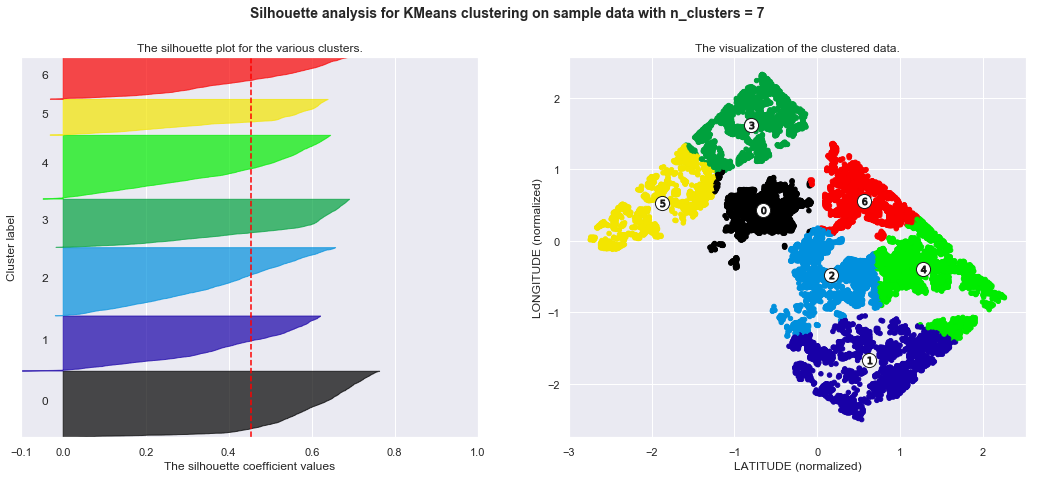

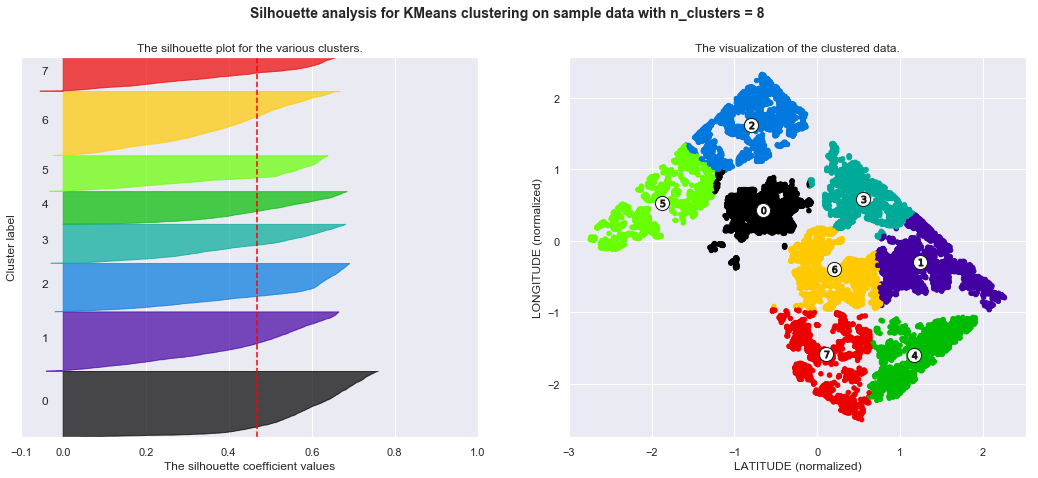

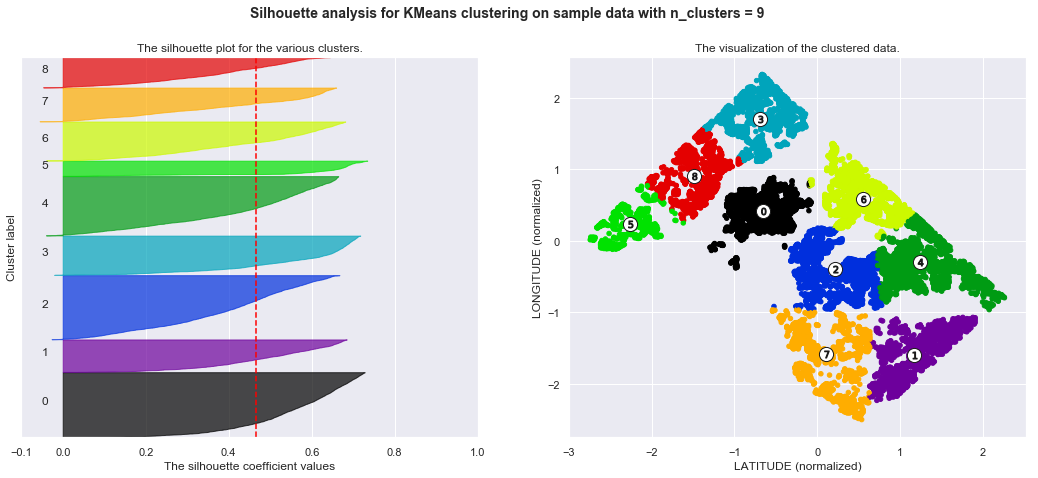

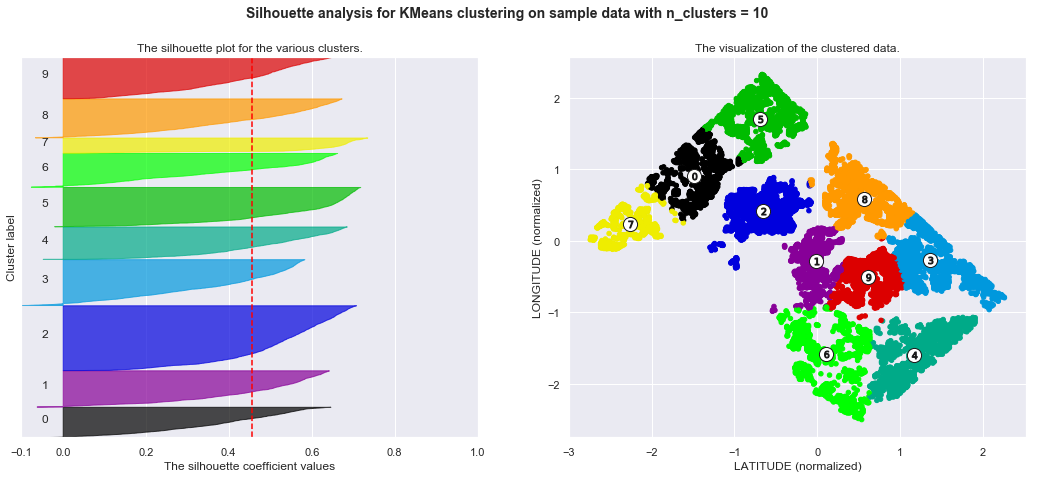

Wall time: 9min 24s


In [55]:
%%time

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X1 = df[['LATITUDE','LONGITUDE']]

range_n_clusters = [7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    X = np.column_stack((X,pd.get_dummies(cluster_labels)))
    acc = cross_val_score(lr_clf,X,y=y,cv=5)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,2),
         "Average accuracy (with kmeans for LATITUDE/LONGITUDE)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1['LATITUDE'], X1['LONGITUDE'], s=20,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("LATITUDE (normalized)")
    ax2.set_ylabel("LONGITUDE (normalized)")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The highest silhouette score for clustering of attributes LATITUDE and LONGITUDE is 0.47 with n_clusters = 8. And this result agrees with total of 8 wards that we have in the data set. Using Kmeans clustering with n clusters = 8, we increase the accuracy from 74% to 81%.

Now lets do DBSCAN clustering.

In [56]:
%%time

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X1 = df[['LATITUDE','LONGITUDE']]

for eps in [0.125, 0.13, 0.14]:
    for mpts in [40, 50, 60]:
    
        cls_fam = DBSCAN(eps=eps, min_samples=mpts)
        cluster_labels = cls_fam.fit_predict(X1)

        silhouette_avg = silhouette_score(X1, cluster_labels)
        X = np.column_stack((X,pd.get_dummies(cluster_labels)))
        acc = cross_val_score(lr_clf,X,y=y,cv=5)
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        print("For eps =", eps,
              "For mpts =", mpts,
              "Estimated number of clusters: %d" % n_clusters_,
              "The average silhouette_score is :", round(silhouette_avg,2),
              "Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2)) 

For eps = 0.125 For mpts = 40 Estimated number of clusters: 6 The average silhouette_score is : 0.17 Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)=  82.95 +- 0.19
For eps = 0.125 For mpts = 50 Estimated number of clusters: 12 The average silhouette_score is : 0.26 Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)=  83.78 +- 0.3
For eps = 0.125 For mpts = 60 Estimated number of clusters: 11 The average silhouette_score is : 0.26 Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)=  84.13 +- 0.21
For eps = 0.13 For mpts = 40 Estimated number of clusters: 5 The average silhouette_score is : 0.14 Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)=  84.17 +- 0.23
For eps = 0.13 For mpts = 50 Estimated number of clusters: 9 The average silhouette_score is : 0.2 Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)=  84.24 +- 0.23
For eps = 0.13 For mpts = 60 Estimated number of clusters: 11 The average silhouette_score is : 0.26 Average accuracy (with DBSCAN for LATITUDE/LON

Using DBSCAN clustering method with eps = 0.14 and mpts = 60, we got the silhouette_score = 0.29 and n clusters = 6. In this way we improved accuracy of the model from 81% (KMeans) to 84% (DBSCAN).